# **`Part I (50 points):  Apply KNN on MNIST Handwritten Digit Classification Dataset`**

**Step 1 (5 points). Prepare the MNIST dataset**

In [2]:
def hw03_derive_MNIST_train_test_data():
    from sklearn.datasets import fetch_openml
    import numpy as np
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist["data"], mnist["target"]
    X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
    y_train = y_train.astype(np.int) # convert to int
    y_test = y_test.astype(np.int) # convert to int
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = hw03_derive_MNIST_train_test_data()
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)


X_train.shape:  (60000, 784)
X_test.shape:  (10000, 784)
y_train.shape:  (60000,)
y_test.shape:  (10000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informatio

In [3]:
# put train data into pandas dataframe 
import pandas as pd
train_data = pd.DataFrame(X_train, columns = ['Pixel_'+str(i) for i in range(1,785)])
train_data.insert(loc=0, column='digit', value=y_train)
train_data.head()


,digit,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,...,Pixel_745,Pixel_746,Pixel_747,Pixel_748,Pixel_749,Pixel_750,Pixel_751,Pixel_752,Pixel_753,Pixel_754,Pixel_755,Pixel_756,Pixel_757,Pixel_758,Pixel_759,Pixel_760,Pixel_761,Pixel_762,Pixel_763,Pixel_764,Pixel_765,Pixel_766,Pixel_767,Pixel_768,Pixel_769,Pixel_770,Pixel_771,Pixel_772,Pixel_773,Pixel_774,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Pixel_784
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# put test data into pandas dataframe 
import pandas as pd
test_data = pd.DataFrame(X_test, columns = ['Pixel_'+str(i) for i in range(1,785)])
test_data.insert(loc=0, column='digit', value=y_test)
test_data.head()


,digit,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,...,Pixel_745,Pixel_746,Pixel_747,Pixel_748,Pixel_749,Pixel_750,Pixel_751,Pixel_752,Pixel_753,Pixel_754,Pixel_755,Pixel_756,Pixel_757,Pixel_758,Pixel_759,Pixel_760,Pixel_761,Pixel_762,Pixel_763,Pixel_764,Pixel_765,Pixel_766,Pixel_767,Pixel_768,Pixel_769,Pixel_770,Pixel_771,Pixel_772,Pixel_773,Pixel_774,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Pixel_784
0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


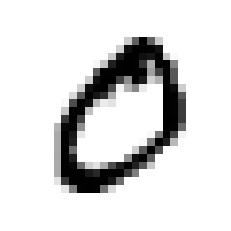

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_train[1] # select one image sample
some_digit_image = some_digit.reshape(28, 28) # reshape from rank-1 tensor (784,) to rank-2 tensor (28,28) 

plt.imshow(some_digit_image, cmap=mpl.cm.binary) # visualize the digig
plt.axis("off")
plt.show()

**Step 2 (25 points): Run K-nearest-neighbors algorithm using existing functions in sklearn (sklearn.neighbors.KNeighborsClassifier)**

In [6]:
# a. (4 points) Give your own descriptions for the following four parameters about their purpose defined in this function: 'n_neighbors', 'metric', 'p', 'n_jobs'. 

# n_neighbors represents number of nearest nodes we will compare with current node, should be an odd number in most cases
# metric is the method of determining how far nodes are from their neighbors
# p represents power parameter when using Minkowski metric.
# n_jobs represents total number of concurrent jobs to run for each neighbor search



In [7]:
# b. (4 points) Give your own descriptions for the following four methods about their purpose defined in this function: ‘fit(X,y)’, 'predict(X)', 'predict_proba', 
# 'score(X,y)'. The description should include your understanding of the computation steps that each method conducts in the KNN algorithm. Other methods given 
# in the sklearn document are worth understanding as well.

# fit(X,y) Fits the k-nearest neighbors classifier from the training dataset.
# predict(X) just predicts the label from features provided
# predict_proba Return probability estimates for the test data X.
# score(X,y) Return the mean accuracy on the given test data and labels.


In [8]:
# c. (4 points) Run the sklearn KNN function (try any K value as you wish) on the test set (10000 images), and report the running time during the prediction process.
from sklearn.neighbors import KNeighborsClassifier
import time
start = time.time()

#Run your codes here
kNN_classifier = KNeighborsClassifier(n_neighbors=5)
kNN_classifier.fit(X_train,y_train)

y_test_predicted_label = kNN_classifier.predict(X_test)

end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))

Program finishes in 43.61148023605347 seconds:


In [9]:
# d. (4 points) Organize the predicted classes and actual classes into Pandas dataframe as follows:

prediction_summary = pd.DataFrame({'predicted_label':y_test_predicted_label, 'actual_label':y_test})
prediction_summary

,predicted_label,actual_label
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [10]:
# e. (4 points) Calculate the overall accuracy of the predictions.

# Note 1: You can use sklearn function (i.e., sklearn.metrics.accuracy_score) to get the accuracy:

from sklearn.metrics import accuracy_score
accuracy_score(y_test_predicted_label, y_test)

0.9688

In [11]:
# Note 2: (recommended in this assignment) You can also implement your own accuracy function
# accuracy = correct_predictions/total_predictions

correct_predictions = sum(y_test_predicted_label==y_test)
correct_predictions

accuracy_pred = correct_predictions/len(y_test_predicted_label)
accuracy_pred

0.9688

In [12]:
# f. (4 points) Calculate the per-class accuracy of the predictions. For instance, among images of digit 1, how many of them are correctly predicted. 

# print("Total predicted 1s = {} and total actual 1s= {} ".format(len(y_test_predicted_label[y_test_predicted_label== 1]),len(y_test[y_test== 1])))

for x in range(0,10):
  predicted = prediction_summary[prediction_summary['predicted_label'] == x]
  predicted_count = len(prediction_summary[prediction_summary['predicted_label'] == x])
  correct_count = len(predicted[predicted['actual_label'] == x])
  # correct_count = len(prediction_summary[prediction_summary['actual_label'] == x])

  accuracy_x = correct_count/predicted_count
  # print(x,predicted_count,correct)
  print("Accuracy of digit {} is: {} ({}%)".format(x,accuracy_x, round((accuracy_x*100),3)))


Accuracy of digit 0 is: 0.963402571711177 (96.34%)
Accuracy of digit 1 is: 0.9545071609098568 (95.451%)
Accuracy of digit 2 is: 0.9821605550049554 (98.216%)
Accuracy of digit 3 is: 0.9644268774703557 (96.443%)
Accuracy of digit 4 is: 0.9762150982419855 (97.622%)
Accuracy of digit 5 is: 0.9652855543113102 (96.529%)
Accuracy of digit 6 is: 0.9813084112149533 (98.131%)
Accuracy of digit 7 is: 0.9610894941634242 (96.109%)
Accuracy of digit 8 is: 0.9880952380952381 (98.81%)
Accuracy of digit 9 is: 0.9562624254473161 (95.626%)


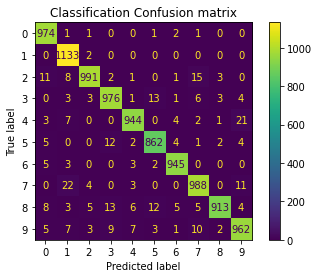

In [13]:
# g. (1points) Let's visualize the classification confusion matrix to check the details of the predictions for each class. You can copy the codes below, 
# and make changes to the  highlighted variables to your variable names.

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_label)
plt.title("Classification Confusion matrix")
plt.show()

**Step 3 (20 points): Implementing K-nearest-neighbors [20 pts]  (for CSCI-5750 students only, bonus for CSCI-4750 students)**

Algorithm: To implement KNN algorithm, we need follow the following steps for each test instance:

(1) compute its distance to all training instances,

(2) pick the closest K training instances,

(3) pick the actual label/class from the K nearest neighbors instances, and

(4) choose the majority class label among K nearest neighbors (KNN) as the label for that test instance.

Details about the algorithm can be found in slides: Week4_Classification_intro_ML_pipeline_canvas.pdf  Download Week4_Classification_intro_ML_pipeline_canvas.pdf, and reading assignment: http://ciml.info/dl/v0_99/ciml-v0_99-ch03.pdf

 

Requirement: Your custom function should read a 2-D array of training examples (feature, labels) and fit the KNN model. Your program should also be able to evaluate performance on separate test examples. 

You need to refer to the course slides, course code demos, and readings (http://ciml.info/dl/v0_99/ciml-v0_99-ch03.pdf) to complete the following two components in this part:

Implement a KNN algorithm from scratch (Page 33 in http://ciml.info/dl/v0_99/ciml-v0_99-ch03.pdf)
Report classification accuracy on training set and test set.
You need to define a class or function to perform KNN classification for MNIST dataset. The function/class should support  the following configuration:

Inputs:

an **N x D** feature matrix **X_train**, where **N** is the number of training instances and **D** is the feature dimension,

an **N x 1** label vector y_train, for the training instances,

an **M x D** feature matrix **X_test** where **M** is the number of test instances, and **D** is the feature dimension,

a scalar **K**: for top-K nearest neighbors using euclidean distance

Outputs:

an **M x 1** predicted label vector for the test instances



In [14]:

# from math import sqrt

# def euclidean_distance(node1, node2):

# 	distance = 0.0

# 	for i in range(len(node1)-1):
# 		distance += (node1[i] - node2[i])**2

# 	return sqrt(distance)
 
# # type(X_test)
# # X_train.
# # len(X_test)
# # [0]
# distance = euclidean_distance(X_train[2], X_test[0])
# #distance

# def sort_distances(test_instance):
  
#   dist = []

#   for x in range(len(X_train)):      
#     dis_x = euclidean_distance(X_train[x], test_instance)
#     dist.append((dis_x,y_train[x]))

#   sorted(dist)


# for row in dataset:
# 	distance = euclidean_distance(row0, row)
# 	print(distance)

In [54]:
# 1. (10 points) Correctly implement the KNN classifier. Rubrics:

# a. Correctly define the distance function. The default distance function is Euclidean distance function. You can write your own codes for the equations we had in slides to calculate 
# distance using Numpy. You can also use existing functions in Scipy package (i.e., scipy.spatial.distance.euclidean) to get the distance: 
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.euclidean.html (Links to an external site.).

# b. Correctly sort the training instances by the their distance to teX_train, X_test, y_train, y_test = hw03_derive_MNIST_train_test_data()

train_data = pd.DataFrame(X_train, columns = ['Pixel_'+str(i) for i in range(1,785)])
test_data = pd.DataFrame(X_test, columns = ['Pixel_'+str(i) for i in range(1,785)])

train_label = pd.DataFrame(y_train, columns =['digit'])
test_label = pd.DataFrame(y_test, columns =['digit'])


# c. Correctly select top K closest training instances and collect their labels

# d. Correctly return the majority class label among the K select classes.

# e. Correctly return the predicted class label for each of test instances.

import statistics
from statistics import mode
from scipy.sparse import data
from scipy.spatial import distance

class KNN:

    def __init__(self,K):
      self.K=K

    def fit(self,X,Y):
        self.X_train=X
        self.y_train=Y

    #Sort neighbors by distance     
    def neighbors(self,train_data,test_row,no_neighbors):

        s=[]
        y_label = y_train
        X_feature = train_data.values

        for i in range(len(X_feature)):
            train_row = X_feature[i]
            train_label = y_label[i]
            dist=distance.euclidean(test_row,train_row)
            s.append((dist,train_label))

        s.sort(key=lambda tup: tup[0])

        neighbour=[] 

        for k in range(no_neighbors):
            neighbour.append(s[k][1])

        return neighbour 

    #Return most frequent neighbor value
    def nieghbor_max(self,List):

        return(max(List, key = List.count))

    def predict_KNN(self,test_data):

        test_feature = test_data.values

        predict_label=[]
        
        for x in range(len(test_feature)):
            top_neigbors = self.neighbors(self.X_train,test_feature[x],3)
            top_neighbor=self.nieghbor_max(top_neigbors)
            predict_label.append(top_neighbor)

        return predict_label




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informatio

In [ ]:
# 2. (5 points) Run the your KNN algorithm (try any K value as you wish) on the test set (for any 100 images only due to time complexity), and report the running time 
# during prediction process.

# The running time can be derived by the following example codes.

# import time
# start = time.time()

custom_knn = KNN(3)
custom_knn.fit(train_data,train_label)

custom_prediction = custom_knn.predict_KNN(test_data.iloc[100])

end = time.time()
time_duration = end-start

print("Program finishes in {} seconds:".format(time_duration))

In [ ]:
# 3. (1 points) As you notice in task 2, the running time would be quite long given a naive implemenation (~6 min for 100 test points and 60000 trianing points).
#  Provide any advices to speed up the calculation using computer science techniques. (hint: you may find helpful clues from sklearn KNN document at 
# https://scikit-learn.org/stable/modules/neighbors.html (Links to an external site.))

# One possible option to speed up is to use a heap to keep track of n nearest neighbors. Since heap will never be larger than n computational complexity will be logarithmic

# Another option is to use Spatial Partioning Trees.

In [ ]:
# 4. (1 points) Organize the predicted classes and actual classes into Pandas dataframe as Step2(d)'
# len(test_data.iloc[100])

prediction_summary = pd.DataFrame({'predicted_label':custom_prediction, 'actual_label':test_label})
prediction_summary


In [ ]:
# 5. (1 points) Calculate the overall accuracy of the predictions as Step2(e)

correct_predictions = sum(custom_prediction==y_test)
correct_predictions

accuracy_pred = correct_predictions/len(custom_prediction)
accuracy_pred


In [ ]:
# 6. (1 points) Calculate the per-class accuracy of the predictions as Step2(f).

for x in range(0,10):
  predicted = prediction_summary[prediction_summary['predicted_label'] == x]
  predicted_count = len(prediction_summary[prediction_summary['predicted_label'] == x])
  correct_count = len(predicted[predicted['actual_label'] == x])
  # correct_count = len(prediction_summary[prediction_summary['actual_label'] == x])

  accuracy_x = correct_count/predicted_count
  # print(x,predicted_count,correct)
  print("Accuracy of digit {} is: {} ({}%)".format(x,accuracy_x, round((accuracy_x*100),3)))



In [ ]:
# 7. (1points) Let's visualize the classification confusion matrix to check the details of the predictions for each class as Step2(g).

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_label, custom_prediction)
plt.title("Classification Confusion matrix")
plt.show()



# **Part II (50 points):  Distance function effect on k‑nearest neighbor classification for medical datasets**

**Overview**

In this part, we need to understand the K-nearest neighbor classification algorithm and practice several major techniques in machine learning workflow.

The following questions should be completed in the Jupyter Notebook.

On page 4 of the attached paper (Experiment section), the authors describe three different attribute types of datasets (categorical, numeric, mixed attributes) used in their study that are chosen from the UCI machine learning repository. In this exercise, we only practice the type of numeric attribute data studied in this paper (summarized in Table 1). 

Overall, our goal is to reproduce the following figures included in the paper and see if we can get a similar conclusion about the effects of the distance metric on the K-NN algorithm. Since the fourth data (Pima) is no longer available on the UCI dataset, we will practice three datasets only in this homework (i.e., results in Fig 4a,b,c, and Fig. 8). 



In [19]:
# Step 1: (3 points)  Prepare the dataset.

# Requirement: Download the three datasets from the UCI website. 



In [20]:
# Step 2 (Optional): Upload the dataset to google drive if you plan to use Google Colab. You can also save the data on your local computer if you plan to use your local python development environment. 
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [21]:
# Step 3: (3 points) Data Loading

# Requirement: Load the data using the 'pandas' module. Recall the steps we have done in class: (Revised) Week2: End-to-End Machine Learning Project

# Here I provide three examples to load the three datasets. You are recommended to write your own codes for data loading.

# 1. Dataset I (Blood): The blood dataset has the column names included. So we can directly use the following example to load the data.

import pandas as pd
blood_df = pd.read_csv('/content/drive/MyDrive/Data/transfusion.data')
blood_df



,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [22]:
# 2. Dataset II (Cancer): The Cancer dataset doesn't have the column names included. So we can use the following example to load the data and add the column names.

import pandas as pd
cancer_df = pd.read_csv('/content/drive/MyDrive/Data/breast-cancer.data',header=None)
cancer_df.columns = ['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','Label']
cancer_df


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Label
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [25]:
# 3. Dataset III (Ecoli): The Ecoli dataset doesn't have the column names included. So we can use the following example to load the data and add the column names.

# import pandas as pd
ecoli_df = pd.read_csv('/content/drive/MyDrive/Data/ecoli.data',header=None,delim_whitespace=True)
ecoli_df.columns = ['sequence','mcg','gvh','lip','chg','aac','alm1','alm2','Label']
ecoli_df

# For the first column (sequence) in the Ecoli dataset we can temporarily remove this column in this exercise.

from sklearn.preprocessing import LabelEncoder
ecoli_df_updated = ecoli_df.drop('sequence',axis=1)


In [26]:
# Step 4: (6 points) Data Analysis

# Requirement: Analyze the features and target variables using .head(), .tail(), .info(),  .value_counts() and .describe() methods. 
# Write a short description to summarize what you have observed based on preliminary analysis (i.e., (1) if numeric, need re-scale?   (2) if textual data, need encoding? (3) if categorical, need one-hot encoding? ) 
# Recall Chapter 2 in text book about categorical feature processing

print("Ecoli Data\n\n",ecoli_df_updated.info())
ecoli_df_updated.describe()
ecoli_df_updated.value_counts()

print("Cancer_data\n\n",cancer_df.info())
cancer_df.describe()

print("\nBlood Data\n\n",blood_df.info())
blood_df.describe()

# Conversion of Ecoli labels from 'Object' datatype to float64 is required
# The end labels for cancer data are binary values of data so one hot encoding will be required. We cannot perform integer encoding which will assign orders to catogories. 
# Scaling required for transfusion data, wild ranges of values detected from features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   Label   336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB
Ecoli Data

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [27]:
# Step 5:  (6 points) Feature preprocessing (Textbook, Chapter 2, Page 62).

# Requirement: As we discussed in the lecture, we need to consider the following techniques if needed.

# 1.  Data imputation, Handling missing data

blood_df[(blood_df.isna().any(axis=1))]
ecoli_df_updated[(ecoli_df_updated.isna().any(axis=1))]
cancer_df_cleaned = cancer_df[-((cancer_df=='?').any(axis=1))]

In [38]:
# 2.  Convert textual/categorical column into numeric numbers (Textbook, Chapter 2, Page 65) 

# Option 2: apply one-hot encoding to features, apply labelEncoder to label.
cancer_features = cancer_df.drop('Label',axis=1)
cancer_label = cancer_df['Label']

cancer_features_encode=pd.get_dummies(cancer_features.astype('category'))
cancer_features_encode

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cancer_label=le.fit_transform(cancer_label)


# Option 1: apply labelEncoder to label.
from sklearn.preprocessing import LabelEncoder
ecoli_df_updated = ecoli_df.drop('sequence',axis=1)
ecoli_df_updated['Label'] = LabelEncoder().fit_transform(ecoli_df['Label'])


ecoli_df_features=ecoli_df_updated.drop('Label',axis=1)
ecoli_df_label=ecoli_df_updated['Label']

In [32]:
# 3. Normalizing/centering/scaling on numeric columns. This is the optional step for you to explore. The paper also didn't mention this step. 
# You can try the model fitting and prediction without normalization to see what's the performance. Also, you can try the normalization to see any changes in results.  
# If you would like to apply normalization, you can refer to the following codes:

from sklearn.preprocessing import MinMaxScaler
blood_features = blood_df.drop('whether he/she donated blood in March 2007',axis=1)
blood_label=blood_df['whether he/she donated blood in March 2007']

scaler = MinMaxScaler()

X_train_scale_blood=scaler.fit_transform(blood_features)
y_train_blood = blood_label 

X_train_scale_cancer=scaler.fit_transform(cancer_features_encode)
y_train_cancer = cancer_label

In [39]:
# Step 6: (12 points) Design k-NN classifier using distance functions and K values (parameter tunning and model selection)

# Requirement: According to the section 'Experimental setup' in the paper (Page 4), you need to write codes to perform the following analysis:

# K values for the neighbor selection are set from 1 to 15
# ten-fold cross-validation is used to divide each dataset into 90% training and 10% testing set for model selection. 
# Specifically, the paper (Hw03_Journal_Paper.pdf  Download Hw03_Journal_Paper.pdf) describes four different distance functions that are commonly used in the k-NN classifier, respectively, /
# which are Euclidean distance, cosine similarity measure, Minkowsky, correlation, and Chi-square distance


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import scipy.spatial.distance as distance
import numpy as np
from sklearn.model_selection import RepeatedKFold

# 1. euclidean distance
distance.euclidean

# 2. Minkowski distance
distance.minkowski

# 3. cosine distance
distance.cosine

# 4. user defined chi_square distance

def chi_square_distance(X, Y):
    with np.errstate(divide="ignore", invalid="ignore"):
        return (1 / 2) * np.sum(np.nan_to_num((np.square(X - Y) / (X + Y))))

n_neighbors = [int(x) for x in np.linspace(1, 15, num = 15)]
metric = [chi_square_distance, distance.euclidean, distance.minkowski, distance.cosine]
param_distribs = {'n_neighbors':n_neighbors,'metric': metric}
estimator = KNeighborsClassifier()

## we are using 10-fold cross-validation here. The key changes are highlighted
grid_search = GridSearchCV(estimator, param_distribs, n_jobs=5,cv=10)

ecoli_fit = grid_search.fit(ecoli_df_features,ecoli_df_label)
cancer_fit = grid_search.fit(X_train_scale_cancer,y_train_cancer)
blood_fit = grid_search.fit(X_train_scale_blood,y_train_blood)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


In [46]:
# Step 7: (15 points) Analysis Results from Cross-validation

# Requirement:

# 1. Get a detailed report from GridSearch cross-validation.

# After the grid search process is finished, you can get all detailed results/report for each parameter combination, including the test accuracy of one model on each fold, 
# the parameters for that model, as well as the averaged test score.  You can refer to the following codes to get the report from GridSearchCV.

# Create a df from the cv_resutls

blood_cv = pd.DataFrame(blood_fit.cv_results_)
cancer_cv=pd.DataFrame(cancer_fit.cv_results_)
ecoli_cv=pd.DataFrame(ecoli_fit.cv_results_)

ecoli_df_= ecoli_cv[['param_n_neighbors','param_metric','mean_test_score']]
blood_df_ = blood_cv[['param_n_neighbors','param_metric','mean_test_score']]
cancer_df_ = cancer_cv[['param_n_neighbors','param_metric','mean_test_score']]


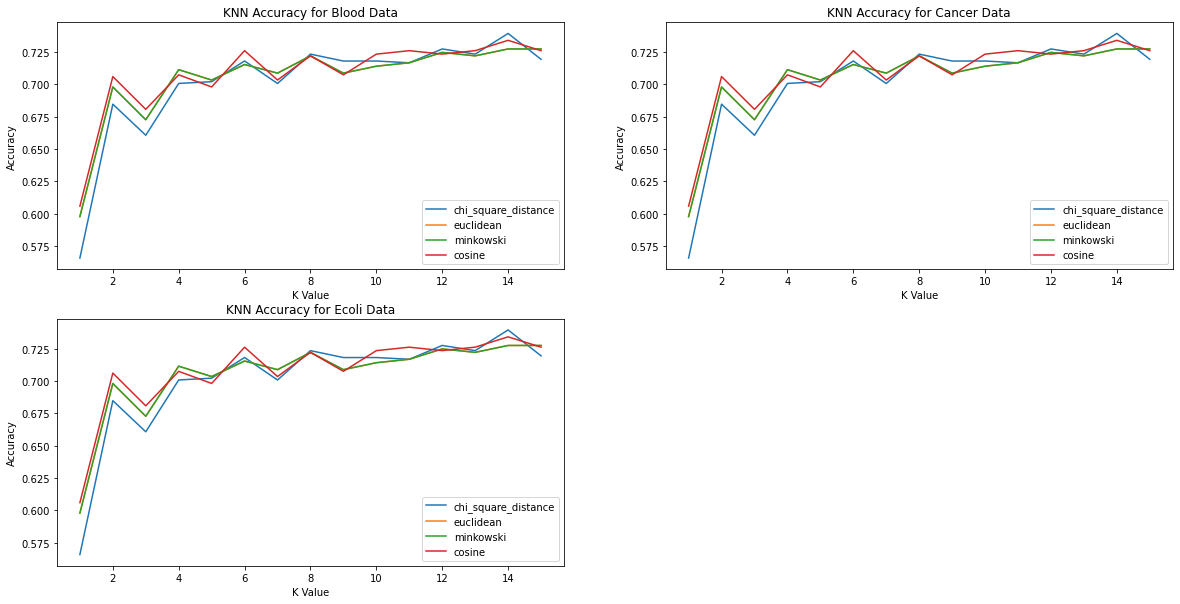

In [47]:
# 2. Visualize the results (with values of K on the x-axis and accuracy on the y-axis) for all four metrics over three datasets using matplotlib. The resulting figure should be similar to the Fig. 4a,  Fig. 4b &  Fig. 4c.
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)   
plt.plot(blood_df_.param_n_neighbors[:15],blood_df_.mean_test_score[:15], label='chi_square_distance')
plt.plot(blood_df_.param_n_neighbors[15:30],blood_df_.mean_test_score[15:30], label='euclidean')
plt.plot(blood_df_.param_n_neighbors[30:45],blood_df_.mean_test_score[30:45], label='minkowski')
plt.plot(blood_df_.param_n_neighbors[45:60],blood_df_.mean_test_score[45:60], label='cosine')
plt.title('KNN Accuracy for Blood Data')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
# #plt.show()


plt.subplot(2,2,2)
plt.plot(cancer_df_.param_n_neighbors[:15],cancer_df_.mean_test_score[:15], label='chi_square_distance')
plt.plot(cancer_df_.param_n_neighbors[15:30],cancer_df_.mean_test_score[15:30], label='euclidean')
plt.plot(cancer_df_.param_n_neighbors[30:45],cancer_df_.mean_test_score[30:45], label='minkowski')
plt.plot(cancer_df_.param_n_neighbors[45:60],cancer_df_.mean_test_score[45:60], label='cosine')
plt.title('KNN Accuracy for Cancer Data')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
#plt.show()

plt.subplot(2,2,3)
plt.plot(ecoli_df_.param_n_neighbors[:15],ecoli_df_.mean_test_score[:15], label='chi_square_distance')
plt.plot(ecoli_df_.param_n_neighbors[15:30],ecoli_df_.mean_test_score[15:30], label='euclidean')
plt.plot(ecoli_df_.param_n_neighbors[30:45],ecoli_df_.mean_test_score[30:45], label='minkowski')
plt.plot(ecoli_df_.param_n_neighbors[45:60],ecoli_df_.mean_test_score[45:60], label='cosine')
plt.title('KNN Accuracy for Ecoli Data')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [48]:
# 3. Report the best cross-validation score on three datasets. For each dataset, you need to select the best k and distance function, then you can run 'cross_val_score()' function to calculate final cross-validation accuracy.

from sklearn.model_selection import cross_val_score

blood_pred = KNeighborsClassifier(n_neighbors=13,metric=chi_square_distance)
cancer_pred = KNeighborsClassifier(n_neighbors=7,metric=distance.minkowski)
ecoli_pred = KNeighborsClassifier(n_neighbors=13,metric=distance.cosine)

print("Cross Validation Accuracy of Blood Data \nDistance: chi_square_distance\nk=13\n",cross_val_score(blood_pred, X_train_scale_blood, y_train_blood, cv=10))
print("\n\nCross Validation Accuracy of Cancer Data \nDistance: minkowski distance\nk=7\n",cross_val_score(cancer_pred, X_train_scale_cancer, y_train_cancer, cv=10))
print("\n\nCross Validation Accuracy of Ecoli Data \nDistance: cosine distance\nk=13\n",cross_val_score(ecoli_pred, ecoli_df_features, ecoli_df_label, cv=10))

Cross Validation Accuracy of Blood Data 
Distance: chi_square_distance
k=13
 [0.33333333 0.78666667 0.81333333 0.76       0.76       0.76
 0.69333333 0.78666667 0.77027027 0.77027027]


Cross Validation Accuracy of Cancer Data 
Distance: minkowski distance
k=7
 [0.79310345 0.75862069 0.79310345 0.75862069 0.75862069 0.72413793
 0.75       0.78571429 0.64285714 0.53571429]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,




Cross Validation Accuracy of Ecoli Data 
Distance: cosine distance
k=13
 [0.85294118 0.88235294 0.82352941 0.82352941 0.91176471 0.79411765
 0.84848485 0.90909091 0.90909091 0.78787879]


Average Classification Accuracy of chi_square_distance over 3 datasets: 
 [0.5657117117117116, 0.6847027027027027, 0.6606486486486487, 0.7007207207207206, 0.7020900900900902, 0.7180720720720721, 0.7006846846846845, 0.7233873873873874, 0.718036036036036, 0.7180540540540541, 0.7167027027027028, 0.7273873873873874, 0.7233873873873874, 0.7393873873873874, 0.7193873873873874]
Average Classification Accuracy of cosine distance over 3 datasets: 
 [0.5977837837837837, 0.6980000000000001, 0.6726486486486486, 0.7113693693693696, 0.7033513513513515, 0.7153513513513513, 0.7086846846846845, 0.722018018018018, 0.7086846846846847, 0.714054054054054, 0.7167207207207206, 0.7247207207207206, 0.722054054054054, 0.7273873873873874, 0.7273873873873874]
Average Classification Accuracy of Euclidean distance over 3 datasets: 
 [0.5977837837837837, 0.6980000000000001, 0.6726486486486486, 0.7113693693693696, 0.7033513513513515, 0.7153513513513513, 0.7086846846846845, 0.722018018018018, 0.7086846846846847, 0.714

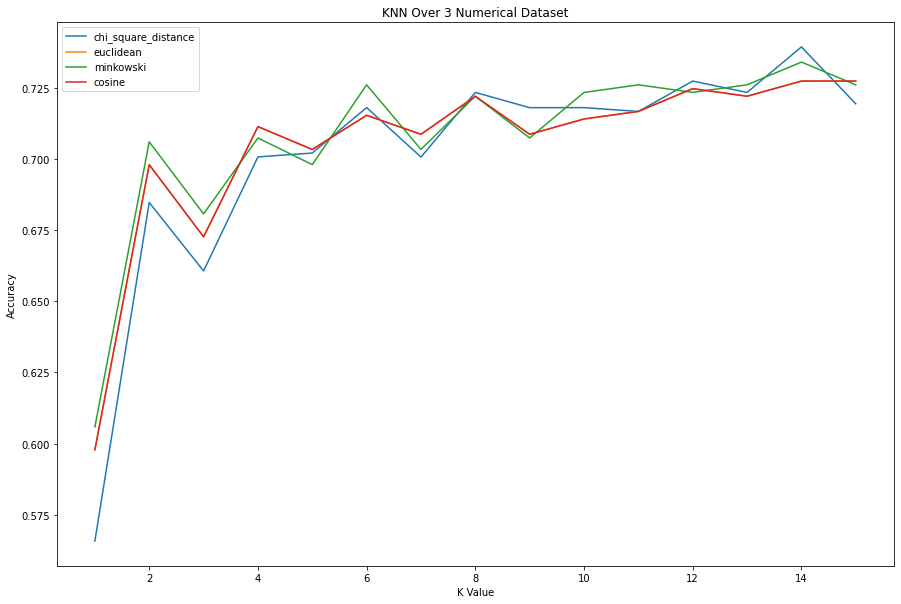

In [51]:
# Step 8.  (5 points)  You need to average classification accuracy of k-NN over three datasets and visualize the results as shown in Figure 8 in the paper.   

mean_chi=[]
mean_cos=[]
mean_eucli=[]
mean_mink=[]

for k in range(0,15):
  can = cancer_cv['mean_test_score'][k]
  blo = blood_cv['mean_test_score'][k]
  eco = ecoli_cv['mean_test_score'][k]
  avg = (can+blo+eco)/3
  mean_chi.append(avg)
  
print("Average Classification Accuracy of chi_square_distance over 3 datasets: \n",mean_chi)

for k in range(15,30):
  can = cancer_cv['mean_test_score'][k]
  blo = blood_cv['mean_test_score'][k]
  eco = ecoli_cv['mean_test_score'][k]
  avg = (can+blo+eco)/3
  mean_cos.append(avg)

print("Average Classification Accuracy of cosine distance over 3 datasets: \n",mean_cos)

for k in range(30,45):
  can = cancer_cv['mean_test_score'][k]
  blo = blood_cv['mean_test_score'][k]
  eco = ecoli_cv['mean_test_score'][k]
  avg = (can+blo+eco)/3
  mean_eucli.append(avg)

print("Average Classification Accuracy of Euclidean distance over 3 datasets: \n",mean_eucli)

for k in range(45,60):
  can=cancer_cv['mean_test_score'][k]
  blo=blood_cv['mean_test_score'][k]
  eco=ecoli_cv['mean_test_score'][k]
  avg=(can+blo+eco)/3
  mean_mink.append(avg)

print("Average Classification Accuracy of minkowski over 3 datasets: \n",mean_mink)   

plt.figure(figsize=(15,10))  
plt.plot(n_neighbors,mean_chi, label='chi_square_distance')
plt.plot(n_neighbors,mean_eucli, label='euclidean')
plt.plot(n_neighbors,mean_mink, label='minkowski')
plt.plot(n_neighbors,mean_cos, label='cosine')
plt.title('KNN Over 3 Numerical Dataset')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Requirement:

# Read the 'Conclusion' section in the paper.
# Question 1: What's the best distance function based on the averaged classification accuracy over three datasets?
# Chi square function appears to be the best distance function for all datasets.
# Question 2: What's the best distance function for each dataset?
# Chi square for blood and cancer, euclidean for ecoli

